# MATLAB and netcdf file input

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import datetime

import xarray
import scipy.io
import scipy.stats

import cartopy

% matplotlib inline

# Loading MATLAB files (```.mat```)

In [2]:
matfilename1 = 'randomInts.mat'
matfilename2 = 'randomNumbers.mat'
matfilename3 = 'zeros.mat'

In [3]:
scipy.io.loadmat(matfilename1)

{'A': array([[10,  5, 10,  1,  8,  2,  7,  3,  6,  8],
        [ 7,  9,  7,  1,  2,  2,  9, 10, 10, 10],
        [ 1,  2,  8,  9,  5,  5, 10,  4,  3,  2],
        [ 3,  5,  8,  7,  5, 10,  6,  2,  8,  6],
        [ 6, 10,  4,  4,  7,  4,  2,  3,  8,  5],
        [10,  8,  7, 10,  8,  6,  2,  7,  4,  1],
        [10, 10,  2,  1,  8,  3,  3,  5,  6,  4],
        [ 2,  7,  8,  5,  3,  8,  9,  4,  1,  2],
        [10,  1,  1,  4,  7,  3,  3,  9,  1,  8],
        [10,  9,  3,  8,  7,  6,  9,  6,  6,  4]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Mar  2 13:16:27 2018',
 '__version__': '1.0'}

In [4]:
matfile1 = scipy.io.loadmat(matfilename1)
matfile2 = scipy.io.loadmat(matfilename2)
matfile3 = scipy.io.loadmat(matfilename3)

These files are loaded as a python ```dict``` (dictionary) object.  Dictionaries are structured as:

```dict = {'key1':values1, 'key2':values2, ...}```

To view all the keys in a given dictionary, use the ```dict.keys()``` method

In [5]:
matfile1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [6]:
matfile1['A']

array([[10,  5, 10,  1,  8,  2,  7,  3,  6,  8],
       [ 7,  9,  7,  1,  2,  2,  9, 10, 10, 10],
       [ 1,  2,  8,  9,  5,  5, 10,  4,  3,  2],
       [ 3,  5,  8,  7,  5, 10,  6,  2,  8,  6],
       [ 6, 10,  4,  4,  7,  4,  2,  3,  8,  5],
       [10,  8,  7, 10,  8,  6,  2,  7,  4,  1],
       [10, 10,  2,  1,  8,  3,  3,  5,  6,  4],
       [ 2,  7,  8,  5,  3,  8,  9,  4,  1,  2],
       [10,  1,  1,  4,  7,  3,  3,  9,  1,  8],
       [10,  9,  3,  8,  7,  6,  9,  6,  6,  4]], dtype=uint8)

__Oops:__  Fix the error below to run the cell correctly

In [7]:
print(matfile2.keys())
print(matfile3.keys()

SyntaxError: unexpected EOF while parsing (<ipython-input-7-e57939aa51fd>, line 2)

In [8]:
B = matfile2['B']
C = matfile3['C']

## ==================== Questions ====================

### 1. How you look at A, B, and C?

* Print the data type of ```A```
* Print its shape

### 2. Can you store A, B, and C in _one_ dictionary and save all of that as a .mat file?

* Hint:  Just like there's a ```scipy.io.loadmat()``` function, there's a [```scipy.io.savemat()```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.savemat.html) function.

## ==================================================

In [9]:
?scipy.io.savemat

# Loading a NetCDF file

[GPCP precipitation data](https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html) (2.5x2.5 degrees, monthly resolution)

In [10]:
nc_filename = 'precip.mon.mean.nc' # should already be in week2 directory
nc_file = xarray.open_dataset(nc_filename) # 'r' for read, 'w' for write

In [11]:
nc_file

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 469)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 -78.75 -76.25 ...
  * lon        (lon) float32 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 ...
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes:
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    documentation:         h

## Extracting data
* Behaves a lot like a dictionary, so you can use ```nc_file['VAR']``` notation
* Appending ```.data``` gets only the data out, without metadata

In [12]:
precip = nc_file['precip'].data
time = nc_file['time'].data
lat = nc_file['lat'].data
lon = nc_file['lon'].data

In [13]:
# calculate mean of full precip data set
precip_annual_mean = numpy.mean(precip, axis=0)

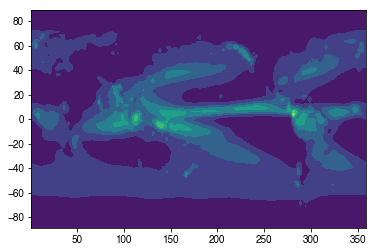

In [14]:
fig = plt.figure()
ax_regular = fig.add_subplot(111)
ax_regular.contourf(lon, lat, precip_annual_mean)

### Now set up a map projection using the ```cartopy``` library

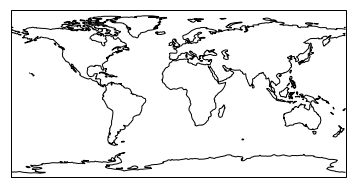

In [15]:
fig = plt.figure()
ax_cartopy = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax_cartopy.coastlines()

* Notice difference between creating a regular axes instance and a cartopy one:
  * WITHOUT MAP:  __```ax = fig.add_subplot(111)```__
  * WITH MAP:  __```ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())```__
    * Whenever you use the __```projection=```__ keyword, the axes that are created are a cartopy object, not strictly a matplotlib object

The __```projection=cartopy.crs.PlateCarree()```__ syntax is specific to the [cartopy](http://scitools.org.uk/cartopy/) package.  The Plate Carree projection is among many [other projections](http://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) available in the library.

In [16]:
print(type(ax_regular))
print(type(ax_cartopy))

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'cartopy.mpl.geoaxes.GeoAxesSubplot'>


### Now add contour data to the cartopy map

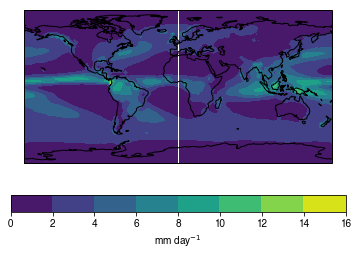

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())

contour_plot = ax.contourf(lon, lat, precip_annual_mean)
cbar = plt.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mm day$^{-1}$')

ax.coastlines()

### Needs a cyclic point

* Note the white line in the middle, where longitudes change from 360$^\circ$ to 0$^\circ$.
* Fix this using the ```cartopy.util``` module, which contains the useful function ```cartopy.util.add_cyclic_point()```

In [18]:
import cartopy.util

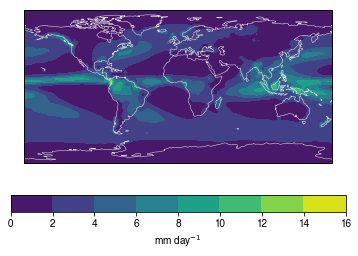

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())

cyclic_precip, cyclic_lon = cartopy.util.add_cyclic_point(precip_annual_mean, coord=lon, axis=1)

contour_plot = ax.contourf(cyclic_lon, lat, cyclic_precip)
cbar = plt.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mm day$^{-1}$')

ax.coastlines(color='0.9', lw=0.5) # also change width and color of coastlines

# Taking a climatology using ```datetime```

Finally, let's take a December-January-February climatology of GPCP precipitation, and plot it for California.

Do this in a few steps...

1. Take the time data from the netcdf file and convert them into datetime objects
  * Use the ```pandas.to_datetime()``` function
2. Create a list of True/False values, where it is True if the month of the datetime object is equal to December, January, or February (i.e., if the month number is in the list ```[12,1,2]```)

In [20]:
# step 1:  convert raw netcdf time data to a datetime object
precip_datetime = pandas.to_datetime(time)

# step 2:  create True/False that reads True where its D, J, or F
true_where_DJF = [i.month in [12,1,2] for i in precip_datetime]

# step 3:  pull out DJF by subsetting precip along the time axis using the True/False list
precip_DJF = precip[true_where_DJF,:,:]

# step 4:  take the mean of precip_DJF along the time axis (axis=0)
precip_DJF_mean = numpy.mean(precip, axis=0)

In [21]:
print(precip.shape)
print(precip_DJF.shape)

(469, 72, 144)
(118, 72, 144)


### Plot the DJF precipitation climatology

* Note the use of ```levels=``` and ```extend=``` in the ```contourf``` function

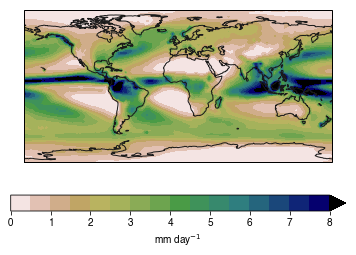

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())

cyclic_precip, cyclic_lon = cartopy.util.add_cyclic_point(precip_DJF_mean, coord=lon, axis=1)

contour_plot = ax.contourf(cyclic_lon, lat, cyclic_precip, levels=numpy.arange(0,8.1,0.5), extend='max', cmap='gist_earth_r')
cbar = plt.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mm day$^{-1}$')

ax.coastlines(color='0.1') # also change width and color of coastlines

# Regress DJF precipitation against the Niño 3.4 index, and plot

In [23]:
# get nino3.4 data

filename = 'ersst4.nino.mth.81-10.ascii.txt'
data_file = pandas.read_table(filename, delim_whitespace=True)
data = data_file.values
nino34 = data[:,8]
year = data[:,0]
month = data[:,1]

nino34_datetime = [datetime.date(int(year[i]),int(month[i]),15) for i in range(year.size)]

In [24]:
# pull out nino34 and precip between 1980 and 2010
nino34_DJF_indices = [i.year in range(1980,2011) and i.month in [12,1,2] for i in nino34_datetime]
precip_DJF_indices = [i.year in range(1980,2011) and i.month in [12,1,2] for i in precip_datetime]

nino34_DJF_1980_2010 = nino34[nino34_DJF_indices]
precip_DJF_1980_2010 = precip[precip_DJF_indices,:,:]

In [25]:
# do regressions of precip ONTO nino34

# empty arrays to store pvals, slope of regression
pvals_array = numpy.zeros((lat.size,lon.size)) # 72x144 (2.5 degree grid boxes)
slope_array = numpy.zeros((lat.size,lon.size))

# embedded loop going through each grid point and calculating the slope and pvalues
for j in range(lat.size):
    for k in range(lon.size):
        slope_array[j,k], tmp, tmp, pvals_array[j,k], tmp = \
        scipy.stats.linregress(nino34_DJF_1980_2010, precip_DJF_1980_2010[:,j,k])

Text(0.5,1,'DJF precip. regressed\nonto Niño 3.4 (1980-2010)')

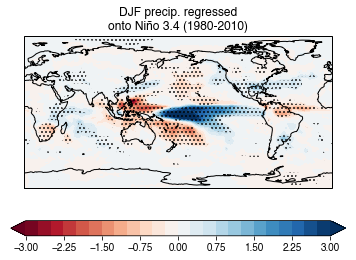

In [26]:
fig = plt.figure()

ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree(central_longitude=180.))
ax.coastlines()

cyclic_slope, cyclic_lon = cartopy.util.add_cyclic_point(slope_array, coord=lon, axis=1)
cyclic_pvals, cyclic_lon = cartopy.util.add_cyclic_point(pvals_array, coord=lon, axis=1)
cyclic_lon = cyclic_lon-180. # lon runs from 0 to 360, but cartopy prefers -180 to 180

contour_plot = ax.contourf(cyclic_lon, lat, cyclic_slope, levels=numpy.arange(-3,3.1,0.25), cmap='RdBu', extend='both')
stippling_plot = ax.contourf(cyclic_lon, lat, cyclic_pvals, levels=[0.0,0.05,1.0], hatches=['...',''], colors='None')

plt.colorbar(contour_plot, orientation='horizontal')
ax.set_title('DJF precip. regressed\nonto Niño 3.4 (1980-2010)')